In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(df)
indicator = pd.DataFrame(indicator, columns=['horsepower'])

In [4]:
#replacing the missing values by their mean 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(df.iloc[:, 1:7])
df.iloc[:, 1:7] = imputer.transform(df.iloc[:, 1:7])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,ford mustang gl
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2,vw pickup
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1,dodge rampage
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1,ford ranger


In [5]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,82.0,1,ford mustang gl
394,4.0,97.0,52.0,2130.0,24.6,82.0,2,vw pickup
395,4.0,135.0,84.0,2295.0,11.6,82.0,1,dodge rampage
396,4.0,120.0,79.0,2625.0,18.6,82.0,1,ford ranger


In [6]:
#standardisaation, Feature scaling
#x_scaled = (x — u) / s

sc_X = StandardScaler(with_mean=False)
X = sc_X.fit_transform(X.drop(['car name'], axis=1))
X

array([[ 4.70902366,  2.94798968,  3.40749723, ...,  4.35694676,
        18.95488984,  1.24836677],
       [ 4.70902366,  3.36090028,  4.32490032, ...,  4.17540731,
        18.95488984,  1.24836677],
       [ 4.70902366,  3.05361797,  3.93172757, ...,  3.99386786,
        18.95488984,  1.24836677],
       ...,
       [ 2.35451183,  1.29634725,  2.20176744, ...,  4.2117152 ,
        22.20429953,  1.24836677],
       [ 2.35451183,  1.15230867,  2.07070985, ...,  6.75326748,
        22.20429953,  1.24836677],
       [ 2.35451183,  1.1427061 ,  2.1493444 , ...,  7.04373059,
        22.20429953,  1.24836677]])

In [7]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
x_sc = nm.fit_transform(X)
X=pd.DataFrame(x_sc)


In [8]:
X['car name'] = df.iloc[:,-1]
X['car name'] = X['car name'].str.replace(" ","")

print(X.shape)
X

(398, 8)


,0,1,2,3,4,5,6,car name
0,0.224629,0.140625,0.162544,0.197626,0.207835,0.904184,0.059549,chevroletchevellemalibu
1,0.222104,0.158519,0.203986,0.205944,0.196935,0.894018,0.058880,buickskylark320
2,0.224428,0.145533,0.187383,0.193617,0.190344,0.903373,0.059496,plymouthsatellite
3,0.223869,0.138779,0.186916,0.192966,0.207131,0.901124,0.059348,amcrebelsst
4,0.225506,0.138874,0.175730,0.195283,0.182565,0.907712,0.059782,fordtorino
...,...,...,...,...,...,...,...,...
393,0.100398,0.057325,0.096120,0.140661,0.241518,0.946808,0.053231,fordmustanggl
394,0.096635,0.038229,0.055941,0.103361,0.366581,0.911320,0.102472,vwpickup
395,0.102104,0.056216,0.095480,0.117671,0.182642,0.962893,0.054136,dodgerampage
396,0.099409,0.048651,0.087426,0.131038,0.285126,0.937476,0.052707,fordranger


In [14]:
#TEST ENCODER
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(X[['car name']])\
    .toarray())
nominals

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

Text(0.5, 1.0, 'x^2')

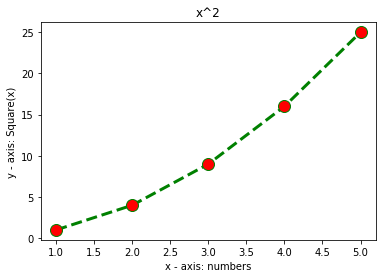

In [25]:

import matplotlib.pyplot as plt


x = [1,2,3,4,5]

y = [1,4,9,16,25]

# plotting the points
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)


plt.xlabel('x - axis: numbers')

plt.ylabel('y - axis: Square(x)')


plt.title('x^2')





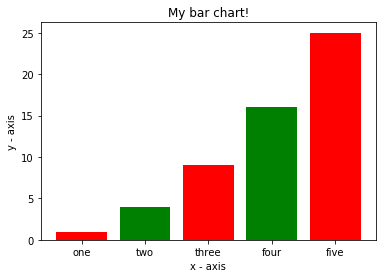

In [32]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [1,4,9,16,25]

# labels for bars
tick_label = ['one', 'two', 'three', 'four', 'five']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')

# function to show the plot
plt.show()



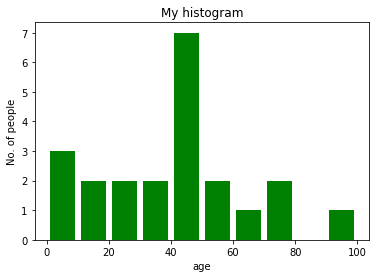

In [22]:
import matplotlib.pyplot as plt

# frequencies
ages = [2,5,70,40,30,45,50,45,43,40,44,
		60,7,13,57,18,90,77,32,21,20,40]

# setting the ranges and no. of intervals
range = (0, 100)
bins = 10

# plotting a histogram
plt.hist(ages, bins, range, color = 'green',
		histtype = 'bar', rwidth = 0.8)

# x-axis label
plt.xlabel('age')
# frequency label
plt.ylabel('No. of people')
# plot title
plt.title('My histogram')

# function to show the plot
plt.show()


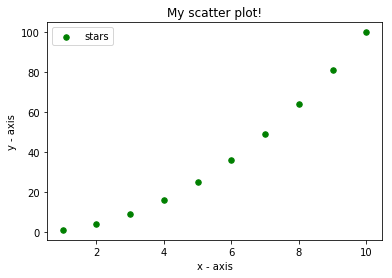

In [31]:
import matplotlib.pyplot as plt

# x-axis values
x = [1,2,3,4,5,6,7,8,9,10]
# y-axis values
y = [1,4,9,16,25,36,49,64,81,100]

# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green",
			marker= "o", s=30)

# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('My scatter plot!')
# showing legend
plt.legend()

# function to show the plot
plt.show()


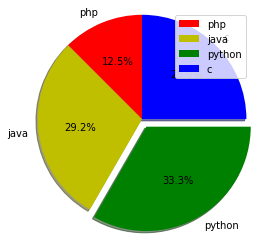

In [33]:
import matplotlib.pyplot as plt

# defining labels
activities = ['php', 'java', 'python', 'c']

# portion covered by each label
slices = [3, 7, 8, 6]

# color for each label
colors = ['r', 'y', 'g', 'b']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
		startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
		radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()


In [34]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Group by in Data frame

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


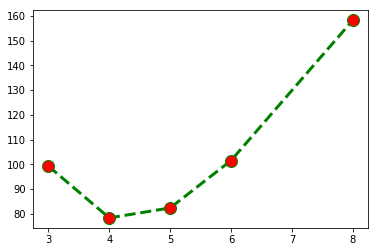

In [50]:
x=data.groupby("cylinders")['horsepower'].mean()
y=set(data['cylinders'])
y=list(y)
plt.plot(y, x, color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)

## Filtering a Data Frame

<BarContainer object of 103 artists>

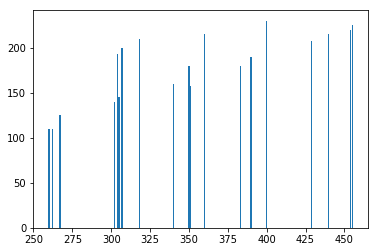

In [54]:
x=data[data['cylinders']==8]['displacement']
y=data[data['cylinders']==8]['horsepower']
#plt.plot(y, x, color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.bar(x, y)